In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

### Lectura de Datos

In [2]:
# Carga de datos
DATA_PATH = '/data/sespinoza/objetivo2/'
data = pd.read_csv(DATA_PATH + 'normalized_expression_mapped_peru.csv', header=0, index_col=0, sep=',', encoding='utf-8')

### Manejo de Nulos y Duplicados

In [3]:
print(data.isnull().sum().sum())

0


In [4]:
#borra los nulos
data = data.dropna()

In [5]:
data.head()

,GSM4043276_HCC004_HTA_2_0.CEL,GSM4043277_HCC011_HTA_2_0.CEL,GSM4043278_HCC013_HTA_2_0.CEL,GSM4043279_HCC015_HTA_2_0.CEL,GSM4043280_HCC016_HTA_2_0.CEL,GSM4043281_HCC025_HTA_2_0.CEL,GSM4043282_HCC026_HTA_2_0.CEL,GSM4043283_HCC034_HTA_2_0.CEL,GSM4043284_HCC047_HTA_2_0.CEL,GSM4043285_HCC054_HTA_2_0.CEL,...,GSM4043336_NTL121_HTA_2_0.CEL,GSM4043337_NTL173_HTA_2_0.CEL,GSM4043338_NTL188_HTA_2_0.CEL,GSM4043339_NTL190_HTA_2_0.CEL,GSM4043340_NTL191_HTA_2_0.CEL,GSM4043341_NTL192_HTA_2_0.CEL,GSM4043342_NTL193_HTA_2_0.CEL,GSM4043343_NTL200_HTA_2_0.CEL,GSM4043344_NTL201_HTA_2_0.CEL,GeneSymbol
TC01000001.hg.1,5.556382,5.385476,5.582431,5.321239,5.580150,5.090377,5.543542,5.815775,5.781128,5.462648,...,5.747558,5.685633,5.678107,5.479305,5.159973,5.572072,5.586533,5.509569,5.263971,DDX11L1
TC01000003.hg.1,3.522511,3.011026,3.754522,3.216142,3.343459,3.151042,3.232807,3.496659,3.271508,3.475425,...,3.641678,3.554388,3.807339,3.292701,3.069621,3.794532,3.673249,3.423120,3.463470,OR4F5
TC01000005.hg.1,8.388213,8.461633,8.107028,8.165957,8.615982,8.331395,8.491633,8.543905,8.646759,8.200830,...,8.313295,8.007746,8.127470,8.079236,8.439039,8.140706,8.413719,8.269379,8.615382,LINC01001
TC01000007.hg.1,11.313075,11.423049,11.083901,11.134547,11.388560,11.209667,11.249790,11.319392,11.483748,11.555652,...,11.500850,10.496035,11.170733,10.906176,11.196305,11.003916,11.591072,11.292875,11.805233,LINC01061
TC01000009.hg.1,3.510059,3.054648,3.632833,3.064161,3.315992,2.796682,3.583861,2.924338,3.181977,2.668511,...,3.061490,3.128445,3.478542,3.024672,2.822522,3.299731,2.986613,3.001979,3.001183,OR4F29


In [6]:
data = data.drop_duplicates(subset='GeneSymbol', keep='first')

### Generar etiqueta a predecir

In [7]:
data.set_index('GeneSymbol', inplace=True)

In [8]:
labels_ma = ['cancer' if 'HCC' in col else 'healthy' if 'NTL' in col else 'unknown' for col in data.columns]
print(labels_ma)

['cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy']


In [9]:
data = data.T
# Añadir las etiquetas al DataFrame
data['labels'] = labels_ma
# Mostrar las etiquetas asignadas
print(data['labels'])

GSM4043276_HCC004_HTA_2_0.CEL     cancer
GSM4043277_HCC011_HTA_2_0.CEL     cancer
GSM4043278_HCC013_HTA_2_0.CEL     cancer
GSM4043279_HCC015_HTA_2_0.CEL     cancer
GSM4043280_HCC016_HTA_2_0.CEL     cancer
                                  ...   
GSM4043340_NTL191_HTA_2_0.CEL    healthy
GSM4043341_NTL192_HTA_2_0.CEL    healthy
GSM4043342_NTL193_HTA_2_0.CEL    healthy
GSM4043343_NTL200_HTA_2_0.CEL    healthy
GSM4043344_NTL201_HTA_2_0.CEL    healthy
Name: labels, Length: 69, dtype: object


In [10]:
#borra todas las filas donde labels es unknown y cuenta cuantos hay
print(data.labels.value_counts())
data = data[data.labels != 'unknown']

cancer     39
healthy    30
Name: labels, dtype: int64


In [11]:
#guarda data en un archivo csv
data.to_csv(DATA_PATH + 'data_peru_prep.csv')

In [12]:
#AFP, F2, CEACAM5, TP53 and CD8A

In [13]:
data_p1 = data.loc[:, ['AFP', 'F2', 'CEACAM5', 'TP53', 'CD8A', 'labels']]

In [14]:
#ASPM, CCNB1, CDK1, DLGAP5, KIF20 A, MT1X, and TOP2A
data_p2 = data.loc[:, ['ASPM', 'CCNB1', 'CDK1', 'DLGAP5', 'KIF20A', 'MT1X', 'TOP2A', 'labels']]

In [15]:
data_p1.head()

GeneSymbol,AFP,F2,CEACAM5,TP53,CD8A,labels
GSM4043276_HCC004_HTA_2_0.CEL,3.351665,10.141542,4.696799,6.999697,6.136806,cancer
GSM4043277_HCC011_HTA_2_0.CEL,10.145141,9.423482,4.213270,6.650938,6.495708,cancer
GSM4043278_HCC013_HTA_2_0.CEL,8.572565,9.752121,4.373660,7.206835,6.021928,cancer
GSM4043279_HCC015_HTA_2_0.CEL,6.198832,9.950746,4.335583,7.578714,6.027868,cancer
GSM4043280_HCC016_HTA_2_0.CEL,3.366131,9.838946,4.561381,7.250749,6.433509,cancer


In [16]:
data_p2.head()

GeneSymbol,ASPM,CCNB1,CDK1,DLGAP5,KIF20A,MT1X,TOP2A,labels
GSM4043276_HCC004_HTA_2_0.CEL,4.110110,4.778999,3.260736,3.781032,4.486760,10.131864,4.148789,cancer
GSM4043277_HCC011_HTA_2_0.CEL,7.796331,6.659267,5.258147,6.176334,6.407129,8.341379,7.523658,cancer
GSM4043278_HCC013_HTA_2_0.CEL,7.117443,6.207112,4.657269,5.343127,5.979888,6.463230,7.194194,cancer
GSM4043279_HCC015_HTA_2_0.CEL,5.905121,5.052133,3.854742,4.283997,4.942791,9.036573,5.283474,cancer
GSM4043280_HCC016_HTA_2_0.CEL,4.901645,5.070973,3.631008,4.396417,4.917592,9.581301,5.286667,cancer


In [17]:
#junta data_p1 y data_p2
data_junta = pd.concat([data_p1, data_p2], axis=1)

In [18]:
#matriz de correlacion de pearson
correlation_matrix = data_junta.corr(method='pearson')

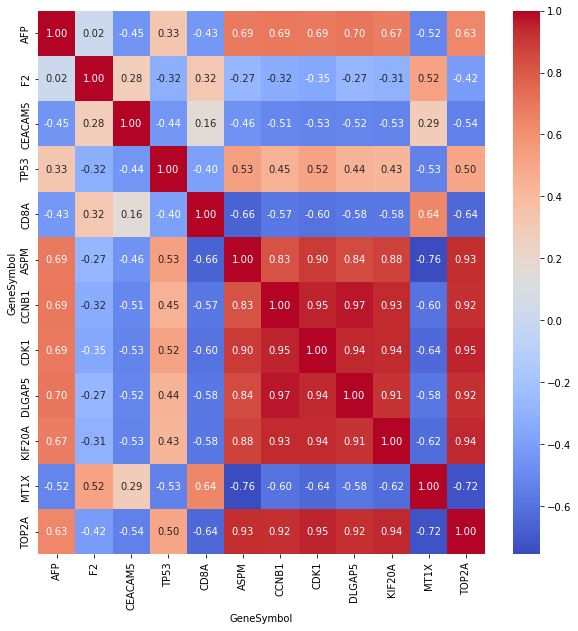

In [19]:
#grafica de matriz de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
